# Introduction à NumPy
Les listes Python montrent vite leur limitation en ce qui concerne le calcul scientifique:

In [6]:
liste = [1,2,3,4]

In [7]:
liste + 1

TypeError: can only concatenate list (not "int") to list

In [8]:
liste * 2

[1, 2, 3, 4, 1, 2, 3, 4]

En effet, contrairement à Matlab et IDL, le support des tableaux multidimensionels numériques n'est pas inclus dans le coeur du langage. 
 

## NumPy arrays

C'est pourquoi il existe une librairie, NumPy, qui permet de faire cela. NumPy est la brique de base à tout l'écosystème scientifique de Python.

In [9]:
import numpy as np

NumPy propose un type de tableau numérique N-dimensions : `array`. L'implémentation de NumPy repose sur du C (transparent) et est donc performante. L'interface utilisateur est très proche de celle de Matlab : 

In [10]:
# to create a NumPy array, call array() on a sequence 
my_array = np.array([0,1,2,3,4])

print(my_array)
print(type(my_array))

[0 1 2 3 4]
<class 'numpy.ndarray'>


In [11]:
my_array + 1

array([1, 2, 3, 4, 5])

In [12]:
my_array * 2

array([0, 2, 4, 6, 8])

In [13]:
my_array ** 2

array([ 0,  1,  4,  9, 16])

Parce que les array NumPy ont été conçus avec la problématique de la performance en tête, les array NumPy ont plusieurs propriétés spécifiques :

* Contrairement aux listes Python, on ne peut pas mélanger les types dans un tableau array NumPy

* Le type de données numériques peut être indiqué si besoin:

In [14]:
np.array([1.1, 2.2, 3.3]) # auto-guess 

array([ 1.1,  2.2,  3.3])

In [15]:
np.array([1.1, 2.2, 3.3]).dtype

dtype('float64')

In [16]:
np.array([1.1, 2.2, 3.3], dtype='int') # casting into int

array([1, 2, 3])

In [17]:
np.array([1.1, 2.2, 3.3], dtype='complex') 
# note that 1j or j is the imaginary unit in Python

array([ 1.1+0.j,  2.2+0.j,  3.3+0.j])

In [18]:
array1 = np.arange(0, 9).reshape((3,3))
array2 = np.arange(9, 0, -1).reshape((3,3))
array1 + array2

array([[9, 9, 9],
       [9, 9, 9],
       [9, 9, 9]])

**attention** : contrairement à matlab, l'opérateur * sur des tableaux NumPy effectue le produit élément par élément (cf.section broadcasting):

In [19]:
array1 * array2

array([[ 0,  8, 14],
       [18, 20, 20],
       [18, 14,  8]])

In [20]:
array1 * np.eye(3)

array([[ 0.,  0.,  0.],
       [ 0.,  4.,  0.],
       [ 0.,  0.,  8.]])

Le produit matriciel (où produit *intérieur*) est obtenu avec la fonction `dot` :

In [21]:
np.dot(array1, array2)

array([[ 12,   9,   6],
       [ 66,  54,  42],
       [120,  99,  78]])

In [22]:
array1.dot(np.eye(3))

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

## Fonctions utiles

Tout comme Matlab, NumPy proposes de nombreuses fonctions permettant de créer et éventuellement d'allouer des tableaux :

In [23]:
np.arange(0, 10, 1) # start, stop, step

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
np.zeros((5,3)) # the shape is a tuple

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [25]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [26]:
np.linspace(0, 10, num=6)

array([  0.,   2.,   4.,   6.,   8.,  10.])

NumPy also provides all mathematical functions which are compatible with NumPy N-D arrays :

In [27]:
array = np.arange(0,9)
print(array)

[0 1 2 3 4 5 6 7 8]


In [28]:
array.shape
# also : ndim, size (!=matlab)

(9,)

In [29]:
array.reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [30]:
array.min()

0

In [31]:
array.max()

8

In [32]:
# 9 random integers between 0 (included) to 10 (excluded)
array = np.random.randint(0, 10, 9)
print(array)

[2 2 0 7 2 7 1 6 6]


In [33]:
# get the array index of the first maximum value
array.argmax()

3

In [34]:
np.sum(array)

33

In [35]:
np.sqrt(array)

array([ 1.41421356,  1.41421356,  0.        ,  2.64575131,  1.41421356,
        2.64575131,  1.        ,  2.44948974,  2.44948974])

In [36]:
np.tan(array) / np.cos(array)

array([ 5.25064634,  5.25064634,  0.        ,  1.1559164 ,  5.25064634,
        1.1559164 ,  2.8824747 , -0.30307769, -0.30307769])

In [37]:
array3 = np.random.rand(3,3)
array3_inv = np.linalg.inv(array3)
print(array3_inv)

[[ 1.66397797  2.91200078 -3.47855701]
 [-1.31936636  0.26895727  1.8917252 ]
 [-0.41405013 -4.87715119  4.74366757]]


In [38]:
array3.dot(array3_inv) # OK

array([[  1.00000000e+00,  -1.93182128e-16,  -8.99416475e-17],
       [ -2.44587606e-16,   1.00000000e+00,   1.51085029e-16],
       [ -3.28998934e-16,  -5.27039096e-16,   1.00000000e+00]])

## Slicing arrays

Récupérer des tranches de valeurs fonctionne de la même manière que pour les listes : 

In [39]:
array

array([2, 2, 0, 7, 2, 7, 1, 6, 6])

In [40]:
array[1:3]

array([2, 0])

In [41]:
array[1::2]

array([2, 7, 7, 6])

**Attention**: les *slices* sont des *vues* du tableau original. 

Ca veut dire que la modification de leurs éléments sont visibles dans le tableau original!

In [42]:
a = np.arange(16).reshape((4,4))

print(a)

a[1:3,1:3] = -1
print(a)



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0  1  2  3]
 [ 4 -1 -1  7]
 [ 8 -1 -1 11]
 [12 13 14 15]]


## Pay attention

* Operations that involve attributes or methods of `ndarray` occur *in-place*. 
* While functions that take an `ndarray` as an argument return a *modified copy*.
* With NumPy ndarray, a=b creates a new reference to b, not a copy.

In [43]:
a = np.random.rand(5)
b = np.arange(5)
b = a # b is a new reference to a.
b[0] = 10
print(b)

[ 10.           0.63250928   0.99839561   0.81211942   0.22269683]


In [44]:
# Because b refers to a, modifyng b also modify a !
print(a)

[ 10.           0.63250928   0.99839561   0.81211942   0.22269683]


In [45]:
b=a.copy() 
b[0] = 20
print(b)
print(a) # a has not been modified.

[ 20.           0.63250928   0.99839561   0.81211942   0.22269683]
[ 10.           0.63250928   0.99839561   0.81211942   0.22269683]


## Broadcasting

Broadcasting rules describe how arrays with different dimensions and/or shapes can be used for computations.

The general rule is that: 2 dimensions are compatible when they are equal or when one of them is 1.

![](http://www.astroml.org/_images/fig_broadcast_visual_1.png)

In [46]:
a = np.arange(3)
b = 5

In [47]:
a+b

array([5, 6, 7])

In [48]:
a = np.ones((3,3))
b = np.arange(3)
a+b

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [49]:
a = np.arange(3).reshape(3,1)
b = np.arange(3)
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<div class='exercice'><h1>Exercice</h1>
Générez le tableau [2^0, 2^1, 2^2, 2^3]

</div>

In [50]:
2**np.arange(4)

array([1, 2, 4, 8], dtype=int32)

<div class='exercice'><h1>Exercice</h1>
Soit deux vecteur a et b, tels que shape(a)=(4,1) et shape(b)=(1,3). Calculer le produit exterieur a o b = a_i.b_j. Le resultat doit être de shape (4,3). 
</div>

In [51]:
a = np.arange(4).reshape(4,1) # reshapes into column vector
b = np.arange(3)
a*b

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

<div class='exercice'><h1>Quizz</h1>
Que va faire ? <br>
a = np.ones((4, 5)) <br>
a[0] = 2
</div>


In [52]:
a = np.ones((4, 5))
a[0] = 2 
a

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

## Fancy indexing, masking

Slicing is great when indices follow a regulary pattern.

But when one want arbitrary indexes, this is known as fancy indexing: the index is an integer array or a list of integer.

This requires a copy of the original array (so a performance cost)

In [53]:
a = np.arange(10)
print(a)

index = [3,1,6]
print(a[index])

[0 1 2 3 4 5 6 7 8 9]
[3 1 6]




Masking is like fancy indexing, except that it must be a *Boolean* array (not a Python list!).

As with fancy indexing, the application of a mask to an array will produce a copy of the original data.


In [54]:
mask = np.array([0,1,0,1,1,0], dtype=bool)
a[mask]

array([1, 3, 4])

**Pay attention**: The following does not work as one could expect from Matlab behaviour !

In [55]:
a[[0,1,0,1,1,0]] # Here we use a Python list. 

array([0, 1, 0, 1, 1, 0])

<div class='exercice'><h1>Quizz</h1>
Pouvez-vous expliquer le dernier exemple ?
</div>

The mask can be generated in the indexing operation itself

In [56]:
a[a > 5]

array([6, 7, 8, 9])

It is also possible to combine masks with operators

In [57]:
a[(a>5) & (a<=8)]

array([6, 7, 8])

La fonction NumPy `where()` prend en argument un tableau de booléen et retourne un tuple des indices où la condition est vérifiée (True). C'est l'équivalent du `find` de Matlab. 

In [58]:
np.where(a > 5)

(array([6, 7, 8, 9], dtype=int64),)

In [59]:
a[np.where(a > 5)]

array([6, 7, 8, 9])

<div class='exercice'><h1>Exercice</h1>
Récupérez le courant plasma (signal SIPMES) pour le choc 47979 et tracez-le uniquement lorsque Ip>50 kA.
</div>

# Autres operations

## Comparaisons termes à termes:

In [60]:
a = np.array([1,2,3,4])
b = np.array([0,2,3,1])
a == b

array([False,  True,  True, False], dtype=bool)

In [61]:
a > b

array([ True, False, False,  True], dtype=bool)

## Comparaisons globales:

In [62]:
np.array_equal(a,b)

False

In [63]:
# Test whether all array elements evaluate to True.
np.all([1, 1, 0]) 

False

In [64]:
# Test whether any array element evaluates to True.
np.any([1, 1, 0])

True

<div class='exercice'><h1>Quizz</h1>
Ces dernières fonctions sont pratiques pour tester des égalités entre tableaux. Quel va être le résultat ci-dessous ?
</div>

In [65]:
>>> a = np.array([1, 2, 3, 2])
>>> b = np.array([2, 2, 3, 2])
>>> c = np.array([6, 4, 4, 5])

In [66]:
>>> ((a <= b) & (b <= c)).all()

True

## Tests avec des flottants

In [168]:
a = np.array([1.00001, 2, 3, 4])
b = np.array([1,2,3,4])

In [169]:
a == b

array([False,  True,  True,  True], dtype=bool)

In [172]:
np.isclose(a,b)

array([ True,  True,  True,  True], dtype=bool)

In [170]:
np.array_equal(a,b)

False

In [171]:
np.allclose(a, b, rtol=1e-5)

True

## Operations logiques:

In [69]:
a = np.array([0,0,1,1])
b = np.array([0,1,0,1])
np.logical_and(a,b)

array([False, False, False,  True], dtype=bool)

## Transposition

In [70]:
a=np.triu(np.ones(3)) # Upper triangle of an array
a

array([[ 1.,  1.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [71]:
a.T

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  1.]])

## Reductions

In [72]:
a = np.array([[1,1],[2,2]])
a.sum() # somme tous les elements par defaut

6

In [73]:
a.sum(axis=0)

array([3, 3])

In [74]:
a.sum(axis=1)

array([2, 4])

Idem pour la pluspart des fonctions : min, max, etc...

## Statistiques

In [75]:
a = np.random.rand(1e6)

In [76]:
a.mean() # ou np.mean(a)

0.50055702785869438

In [77]:
a.std() # ou np.std(a)

0.28875884215250858

## Grilles

In [78]:
x, y = np.arange(4), np.arange(4).reshape(4,1)
# ou, astuce pour y : np.arange(4)[:, np.newaxis]
x * y

array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

In [79]:
x, y = np.meshgrid(np.arange(4), np.arange(4))
print(x)
print(y)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


## Aplatissement

In [80]:
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [81]:
a.ravel() # Flattening

array([1, 2, 3, 4, 5, 6])

In [82]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [83]:
a.T.ravel() # ou a.transpose().ravel()

array([1, 4, 2, 5, 3, 6])

<div class='exercice'><h1>Exercice</h1>
Utilisez les fonctions ravel() et flatten(). Quelle est la différence entre ces deux fonctions? (indice: laquelle retourne une vue et laquelle une copie?)
</div>

In [84]:
a = np.array([[1,2,3],[4,5,6]])
b = a.ravel() # Return a flattened array.
c = a.flatten() # Return a copy of the array collapsed into one dimension.

In [85]:
a[0,0] = -1
print(b)
print(c)


[-1  2  3  4  5  6]
[1 2 3 4 5 6]


## Reshaping

In [86]:
a

array([[-1,  2,  3],
       [ 4,  5,  6]])

Reshaper sans spécifier l'ensemble des dimensions :  

In [87]:
# unspecified (-1) value is inferred
a.reshape(3, -1) 

array([[-1,  2],
       [ 3,  4],
       [ 5,  6]])

##Algebre lineaire
Le module [numpy.linalg](http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.linalg.html) contiens les outils pour:

* Matrix and vector products
* Decompositions
* Matrix eigenvalues
* Norms and other numbers
* Solving equations and inverting matrices

In [159]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
print(a) 
print(b)
np.dot(a, b)

[[1, 0], [0, 1]]
[[4, 1], [2, 2]]


array([[4, 1],
       [2, 2]])

#Introduction à SciPy

##Fonctions Spéciales
The main feature of the [scipy.special](http://docs.scipy.org/doc/scipy/reference/tutorial/special.html) package is the definition of numerous special functions of mathematical physics. Available functions include airy, elliptic, bessel, gamma, beta, hypergeometric, parabolic cylinder, mathieu, spheroidal wave, struve, and kelvin. 

In [161]:
help(scipy.special) # For a complete list of the available functions 

Help on package scipy.special in scipy:

NAME
    scipy.special

DESCRIPTION
    Special functions (:mod:`scipy.special`)
    
    .. module:: scipy.special
    
    Nearly all of the functions below are universal functions and follow
    broadcasting and automatic array-looping rules. Exceptions are noted.
    
    Error handling
    
    Errors are handled by returning nans, or other appropriate values.
    Some of the special function routines will emit warnings when an error
    occurs.  By default this is disabled.  To enable such messages use
    ``errprint(1)``, and to disable such messages use ``errprint(0)``.
    
    Example:
    
        >>> print scipy.special.bdtr(-1,10,0.3)
        >>> scipy.special.errprint(1)
        >>> print scipy.special.bdtr(-1,10,0.3)
    
    .. autosummary::
       :toctree: generated/
    
       errprint
       SpecialFunctionWarning -- Warning that can be issued with ``errprint(True)``
    
    Available functions
    
    Airy functions
    -

##Integration

Vérifions l'intégrale de Gauss avec le module [integrate](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html) du package SciPy: 
$$
\int_{-\infty}^{+\infty} e^{-x^2} dx = \sqrt{\pi}
$$

In [105]:
def integrande(x):
    return np.exp(-x**2)

import scipy.integrate # integration routines
# general integration
# Infinite inputs are also allowed in quad by using ± inf 
y, abserr = scipy.integrate.quad(integrande, -np.inf, +np.inf)

In [106]:
# check how close the result is 
np.isclose(y, np.sqrt(np.pi))

True

##Optimization

SciPy also proposes an [optimization](http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) module, which contains:

* Unconstrained and constrained minimization of multivariate scalar functions (minimize) using a variety of algorithms (e.g. BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP)
* Global (brute-force) optimization routines (e.g. basinhopping, differential_evolution)
* Least-squares minimization (leastsq) and curve fitting (curve_fit) algorithms
* Scalar univariate functions minimizers (minimize_scalar) and root finders (newton)
* Multivariate equation system solvers (root) using a variety of algorithms (e.g. hybrid Powell, Levenberg-Marquardt or large-scale methods such as Newton-Krylov).


##Interpolation

There are several general [interpolation](http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) facilities available in SciPy,  for data in 1, 2, and higher dimensions:

* A class representing an interpolant (interp1d) in 1-D, offering several interpolation methods.
* Convenience function griddata offering a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, ...). Object-oriented interface for the underlying routines is also available.
* Functions for 1- and 2-dimensional (smoothed) cubic-spline interpolation, based on the FORTRAN library FITPACK. There are both procedural and object-oriented interfaces for the FITPACK library.
* Interpolation using Radial Basis Functions.

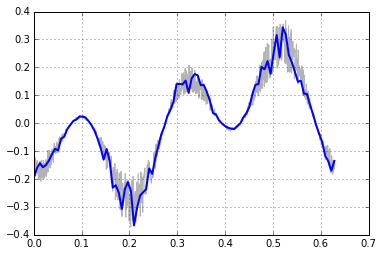

In [150]:
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
%matplotlib inline

# generates a noisy signal
signal_length = 1000
omega = 10
t = np.linspace(0, (2*np.pi)/omega, signal_length)
noisy_signal = (0.1*np.random.rand(signal_length) - 0.2) \
                *(np.cos(3*omega*t) + np.sin(omega*t))

# interpolating the signal
f = interp1d(t, noisy_signal)

# plot the original signal 
# and the interpolation on a decimated basis
t2 = np.linspace(0, (2*np.pi)/omega, signal_length/10)
plt.plot(t, noisy_signal, color=(.7,.7,.7,1))
plt.plot(t2, f(t2), lw=2)
plt.grid(True)

##Fast Fourier Transforms
[fftpack](http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html)


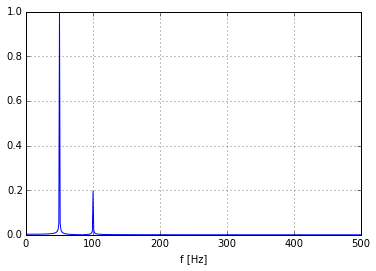

In [152]:
from scipy.fftpack import fft

# signal frequency
f = 50e6
# Number of samplepoints
N = 1000
# time sampling
T = 1/N
t = np.linspace(0, N*T, N)
# signal
y = np.cos(2*np.pi*f*t) + 0.2*np.cos(2*np.pi*2*f*t)

yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid(True)
plt.xlabel('f [Hz]')


## Signal Processing
The [signal](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html)  toolbox currently contains some filtering functions, a limited set of filter design tools, and a few B-spline interpolation algorithms for one- and two-dimensional data. 

While the B-spline algorithms could technically be placed under the interpolation category, they are included here because they only work with equally-spaced data and make heavy use of filter-theory and transfer-function formalism to provide a fast B-spline transform. 

##Statistiques
See[scipy.stats](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)

#Image Processing
See [scikit-image](http://scikit-image.org/) or [Pillow](https://python-pillow.github.io/)

#Machine Learning
See [Scikit Learn](http://scikit-learn.org/)

#Autres SciKits
See [SciKits](https://scikits.appspot.com/scikits)

In [162]:
#CSS Styling
from IPython import utils  
from IPython.core.display import HTML  
import os  
def css_styling():  
    """Load the CSS sheet 'custom.css' located in the directory"""
    styles = "<style>\n%s\n</style>" % (open('./custom.css','r').read())
    return HTML(styles)
css_styling()  